### Polynomial regression

Below we explore issues of under and overfitting data using polynomial regression on synthetic data.

The advantage to this presentation is that we can visualize the complexity of the fitted curve.


In [73]:
#from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

n_samples=20
noise=0.5

### There was too much variability in the sklearn version of this function
### so I implemented a version
def make_regression(n_features,noise,n_samples,random_state):
    np.random.seed(random_state)
    dom = np.linspace(0,3,3*n_samples)
    dom = np.random.choice(dom,n_samples).reshape(n_samples,1)
    nz = np.random.randn(n_samples,1)*noise
    y = 2+1.7*dom+nz
    return dom,y


#from sklearn.datasets import make_regression
noise=0.5
Xnb,y = make_regression(n_features=1,noise=noise,n_samples=n_samples,random_state=42)
Xnb = np.sqrt(Xnb-np.min(Xnb))
plt.scatter(Xnb,y)
plt.title("The data to be fit")
data = np.c_[Xnb,y]
plt.show()

In [75]:
#X = np.c_[np.ones(Xnb.shape[0]),Xnb[:,0]]
Xnb[:5]
#y[:5]

array([[1.35296285],
       [1.57845666],
       [1.14979733],
       [0.78113347],
       [1.42614807]])

### Degree 1

A degree 1 polynomial is just a line.  

The cell below achieves the variable transformation

$$[x_1]^T \rightarrow [x_1^0,x_1^1 ]^T = [1,x_1]^T$$

In other words, it just adds a bias column.

In [76]:
## Making degree 1 features turns out to be an easy way to add a bias column!

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
Xp = poly.fit_transform(Xnb)
Xp[:2]

array([[1.        , 1.35296285],
       [1.        , 1.57845666]])

### The normal equations

Below and elsewhere we fit the data using the normal equations.

This is the solution $\bar{w} = X^\dagger y$, where $X^\dagger$ is the pseudo-inverse.

We also print the quality of the fit under the $R^2$ error metric.

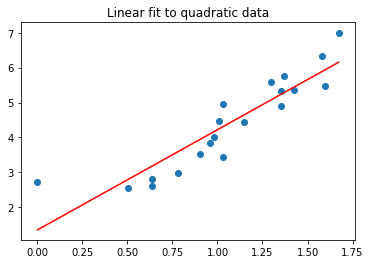

0.7770681429083474

In [77]:
from sklearn.metrics import r2_score
w1 = np.linalg.pinv(Xp).dot(y)
plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = np.c_[np.ones(xx.shape[0]),xx]
yhat = x.dot(w1)
plt.plot(xx,yhat,c='r')
plt.title("Linear fit to quadratic data")
plt.show()
r2_score(Xp.dot(w1),y)

### Degree 2

We now perform a degree 2 polynomial feature transformation.

$$[x_1]^T \rightarrow [x_1^0,x_1^1,x_1^2]^T = [1,x_1^1,x_1^2]^T$$

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(Xnb)
Xp[:2]

array([[1.        , 1.35296285, 1.83050847],
       [1.        , 1.57845666, 2.49152542]])

### A better fit

The quadratic curve is a better fit for the data.

Because we constructed the data, we know that the quadratic curve is the "actual" complexity of the target function.


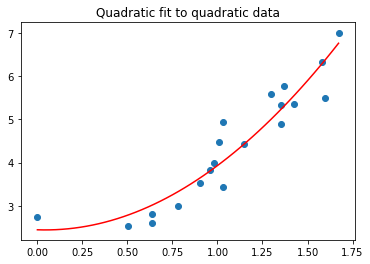

0.8835903755842587

In [79]:
w2 = np.linalg.pinv(Xp).dot(y)
plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w2)
plt.plot(xx,yhat,c='r')
plt.title("Quadratic fit to quadratic data")
plt.show()
r2_score(Xp.dot(w2),y)

### Degree 5

We now consider a degree 5 transformation of the data.

$$[x_1]^T \rightarrow [x_1^0,x_1^1,x_1^2,x_1^3,x_1^4,x_1^5]^T = [1,x_1^1,x_1^2,x_1^3,x_1^4,x_1^5]^T$$

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
Xp = poly.fit_transform(Xnb)
Xp[:2]

array([[1.        , 1.35296285, 1.83050847, 2.47660996, 3.35076128,
        4.53345553],
       [1.        , 1.57845666, 2.49152542, 3.9327649 , 6.20769894,
        9.79858372]])

### An even better fit...

The degree 5 curve fits the data even better than the degree 2 curve.

However you can see even at this level that the curve is somewhat contorted.

It is specialized to *this particular* training set rather than the probability distribution that generates the training set.


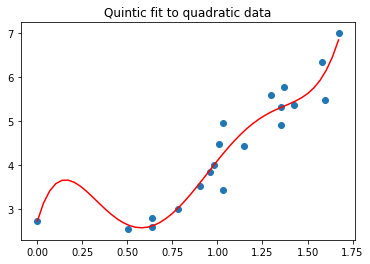

0.9212041566404681

In [81]:
w5 = np.linalg.pinv(Xp).dot(y)
plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w5)
plt.plot(xx,yhat,c='r')
plt.title("Quintic fit to quadratic data")
plt.show()
r2_score(Xp.dot(w5),y)

### Degree 30

We now fit the data with a degree 30 curve.

The in-sample error drops to almost zero.

But will it hold up when we introduce testing data?

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(30)
Xp = poly.fit_transform(Xnb)


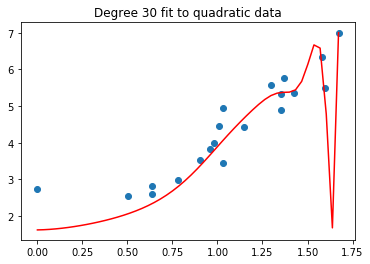

0.9088851902978746

In [83]:
w30 = np.linalg.pinv(Xp).dot(y)
lamb=10**-1

A = np.eye(len(w30))
A[0,0]=0

w30 = np.linalg.inv(Xp.T.dot(Xp)+lamb*A).dot(Xp.T.dot(y))

plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w30)
plt.plot(xx,yhat,c='r')
plt.title("Degree 30 fit to quadratic data")
plt.show()
r2_score(Xp.dot(w30),y)

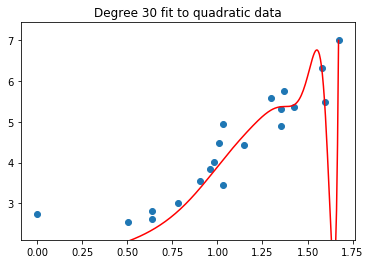

0.9088851902978746


3.6617834200914965

In [84]:
plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0],num=300)
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w30)
plt.plot(xx,yhat,c='r')
plt.title("Degree 30 fit to quadratic data")
plt.ylim(min(y)-0.1*(max(y)-min(y)),max(y)+0.1*(max(y)-min(y)))
plt.show()
print(r2_score(Xp.dot(w30),y))
np.linalg.norm(w30)

### Out of sample error

We now estimate the out of sample error for each of the above models.

To do this we produce more data generated from the same probability distribution $P(x,y)$ as the original data.

The performance of each model on this larger dataset will be very close to the true out-of-sample error of the model.


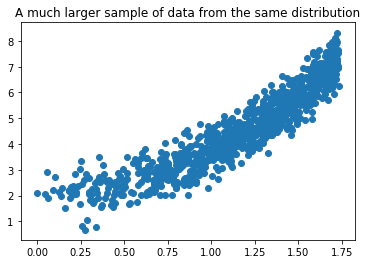

In [60]:
Xnb,y = make_regression(n_features=1,noise=noise,n_samples=1000,random_state=42)
Xnb = np.sqrt(Xnb-np.min(Xnb))
plt.scatter(Xnb,y)
data = np.c_[Xnb,y]
plt.title("A much larger sample of data from the same distribution")
plt.show()

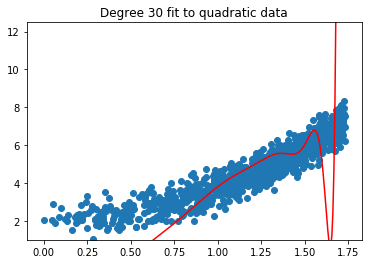

0.009829390848175468

In [61]:
poly = PolynomialFeatures(30)
Xp = poly.fit_transform(Xnb)

plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0],num=300)
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w30)
plt.plot(xx,yhat,c='r')
plt.title("Degree 30 fit to quadratic data")
plt.ylim(min(y)*1.5,max(y)*1.5)
plt.show()
r2_score(Xp.dot(w30),y)

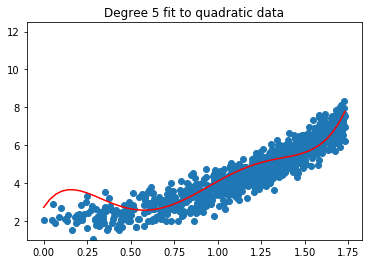

0.7814373198336974

In [62]:
poly = PolynomialFeatures(5)
Xp = poly.fit_transform(Xnb)

plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w5)
plt.plot(xx,yhat,c='r')
plt.title("Degree 5 fit to quadratic data")
plt.ylim(min(y)*1.5,max(y)*1.5)
plt.show()
r2_score(Xp.dot(w5),y)

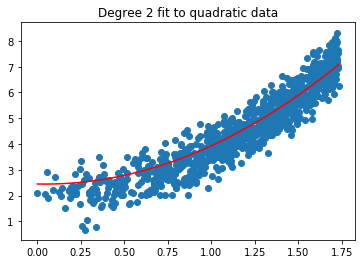

0.8439397548066159

In [63]:
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(Xnb)

plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w2)
plt.plot(xx,yhat,c='r')
plt.title("Degree 2 fit to quadratic data")
#plt.ylim(min(y)*1.5,max(y)*1.5)
plt.show()
r2_score(Xp.dot(w2),y)

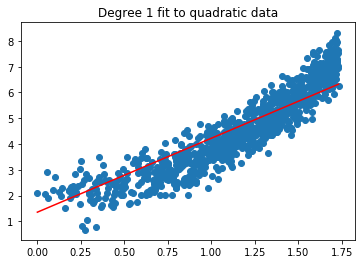

0.6657674301366077

In [64]:
poly = PolynomialFeatures(1)
Xp = poly.fit_transform(Xnb)

plt.scatter(data[:,0],data[:,1])
xx = np.linspace(start=np.min(data,axis=0)[0],stop=np.max(data,axis=0)[0])
x = poly.fit_transform(xx.reshape(-1,1))
yhat = x.dot(w1)
plt.plot(xx,yhat,c='r')
plt.title("Degree 1 fit to quadratic data")
#plt.ylim(min(y)*1.5,max(y)*1.5)
plt.show()
r2_score(Xp.dot(w1),y)

### Summary thus far

For the data in this problem we saw that the degree 2 solution provides the **best generalization**. 

It has both of our desirable properties:

1. $E_{in}(g) \approx E_{out}(g)$  (both are about 0.85)
2. $E_{out}(g)$ is minimal (at least among the models considered).

**For this data** the quadratic model is the one that optimizes the **tradeoff between bias and variance**.

**bias**: Simple models are "biased" and may be incapable of low error if they cannot match the complexity of the target function.

**variance**: Overly complex models are so flexible that they may "memorize" the training data rather than learning the statistical properties of $P(\bar{x},y)$.


In high bias scenario:
---
Different training sets give same quality $g$, but performance is low.

In high variance scenario:
---

Best possible $g$ is very good, but which $g$ you get varies wildly with which training data is used.


### Learning curves



In [65]:
from sklearn.metrics import mean_squared_error

def make_point(X_train,X_test,y_train,y_test):
    w = np.linalg.pinv(X_train).dot(y_train)
    error = mean_squared_error
    #error = r2_score
    s_tr = error(X_train.dot(w),y_train)
    s_te = error(X_test.dot(w),y_test)
    return np.array([s_tr,s_te])

def make_curve(X,y):
    N = X.shape[0]
    samp = 5
    points = []
    for n in range(3,N//2):
        scores = np.zeros(2)
        for s in range(samp):
            shuff = np.random.permutation(N)
            Xs = X[shuff]
            ys = y[shuff]
            mp = make_point(Xs[:n],Xs[-N//2:],ys[:n],ys[-N//2:])
            scores += mp
        scores /= samp
        points.append(scores)
    return np.array(points)



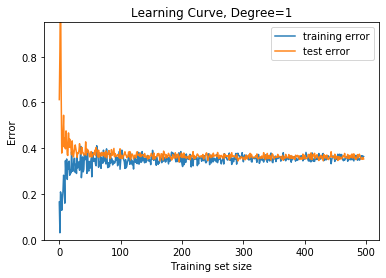

High bias--average best hypothesis not great
 Quickly converges but error is high


In [66]:
degree=1
poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(Xnb)

N= Xp.shape[0]
points = make_curve(Xp,y)
C1 = np.array(list(zip(np.arange(len(points)),points[:,0])))
C2 = np.array(list(zip(np.arange(len(points)),points[:,1])))


plt.plot(C1[:,0],C1[:,1],alpha=0.95,label="training error")

plt.plot(C2[:,0],C2[:,1],alpha=0.95,label="test error")
plt.ylim(0,.95)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.title("Learning Curve, Degree={}".format(degree))
plt.show()
print("High bias--average best hypothesis not great\n Quickly converges but error is high")

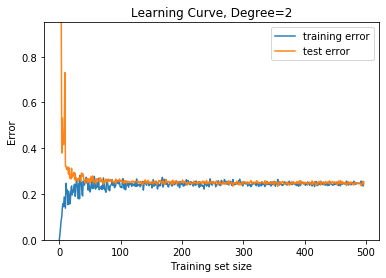

Ideal -- converge to low error, not sensitive to training set


In [67]:
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(Xnb)
N= Xp.shape[0]
points = make_curve(Xp,y)
C1 = np.array(list(zip(np.arange(len(points)),points[:,0])))
C2 = np.array(list(zip(np.arange(len(points)),points[:,1])))
plt.plot(C1[:,0],C1[:,1],alpha=0.95,label="training error")

plt.plot(C2[:,0],C2[:,1],alpha=0.95,label="test error")
plt.ylim(0,.95)
plt.legend()
plt.title("Learning Curve, Degree=2")
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.show()
print("Ideal -- converge to low error, not sensitive to training set")


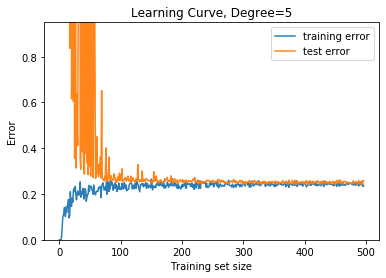

Converges to low error, but out of sample
 performance beginning to depend on training set


In [68]:
degree = 5
poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(Xnb)
N= Xp.shape[0]
points = make_curve(Xp,y)
C1 = np.array(list(zip(np.arange(len(points)),points[:,0])))
C2 = np.array(list(zip(np.arange(len(points)),points[:,1])))
plt.plot(C1[:,0],C1[:,1],alpha=0.95,label="training error")

plt.plot(C2[:,0],C2[:,1],alpha=0.95,label="test error")
plt.ylim(0,.95)
plt.legend()
plt.title("Learning Curve, Degree={}".format(degree))
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.show()
print("Converges to low error, but out of sample\n performance beginning to depend on training set")

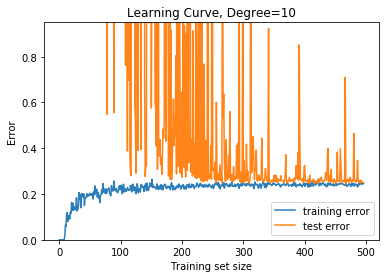

Converges to low error, but out-of-sample
 performance is dependent on training set


In [69]:
degree = 10
poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(Xnb)
N= Xp.shape[0]
points = make_curve(Xp,y)
C1 = np.array(list(zip(np.arange(len(points)),points[:,0])))
C2 = np.array(list(zip(np.arange(len(points)),points[:,1])))
plt.plot(C1[:,0],C1[:,1],alpha=0.95,label="training error")

plt.plot(C2[:,0],C2[:,1],alpha=0.95,label="test error")
plt.ylim(0,.95)
plt.legend()
plt.title("Learning Curve, Degree={}".format(degree))
plt.xlabel("Training set size")
plt.ylabel("Error")

plt.show()
print("Converges to low error, but out-of-sample\n performance is dependent on training set")

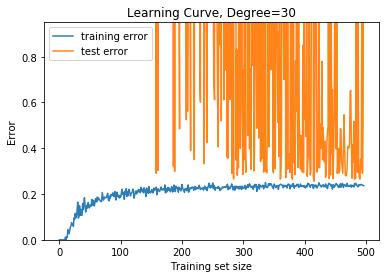

High variance--performance very dependent on training data


In [70]:
degree = 30
poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(Xnb)
N= Xp.shape[0]
points = make_curve(Xp,y)
C1 = np.array(list(zip(np.arange(len(points)),points[:,0])))
C2 = np.array(list(zip(np.arange(len(points)),points[:,1])))
plt.plot(C1[:,0],C1[:,1],alpha=0.95,label="training error")

plt.plot(C2[:,0],C2[:,1],alpha=0.95,label="test error")
plt.ylim(0,.95)
plt.legend()
plt.title("Learning Curve, Degree={}".format(degree))
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.show()
print("High variance--performance very dependent on training data")